In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pylab as plt

In [3]:
df = pd.read_csv('A2457.txt', delim_whitespace=True, lineterminator='\n').drop('id', axis = 1)

In [4]:
df

,r,dr,g,dg,u,du,i,di,z,dz,zspec
0,20.8498,0.087124,20.8860,0.005956,19.9325,0.014263,20.0788,0.035860,19.8511,0.075540,2.505000
1,20.2984,0.046205,20.6447,0.004217,19.2952,0.008835,20.0889,0.034942,20.4333,0.078268,1.895000
2,20.8883,0.064217,21.7938,0.012222,22.1299,0.092288,20.5905,0.044032,20.0958,0.099445,3.405000
3,15.3928,0.001871,16.4288,0.000498,16.1900,0.002139,15.0507,0.001141,14.7237,0.002326,0.039055
4,21.1361,0.085443,21.3559,0.007474,20.6440,0.029433,20.8778,0.056025,21.2004,0.124193,2.365000
...,...,...,...,...,...,...,...,...,...,...,...
662,19.1186,0.027805,21.0347,0.013256,21.4664,0.091210,18.4442,0.011597,18.1855,0.023093,0.410812
663,19.6923,0.042599,21.9020,0.022806,22.8041,0.140533,18.8218,0.017058,18.7771,0.039564,0.499613
664,20.4720,0.058682,20.5128,0.003799,19.5003,0.009951,20.3356,0.046609,20.1929,0.103614,2.574073
665,20.4289,0.074319,22.5736,0.033274,22.4091,0.127780,19.6188,0.029984,19.3738,0.063926,0.689085


In [5]:
df['r'].describe()

count    667.000000
mean      18.574310
std        1.633716
min       14.102200
25%       17.324500
50%       18.623100
75%       19.905000
max       22.360700
Name: r, dtype: float64

In [6]:
df['dr'].describe()

count    667.000000
mean       0.029039
std        0.030398
min        0.000874
25%        0.007195
50%        0.017438
75%        0.041916
max        0.193593
Name: dr, dtype: float64

In [7]:
df['zspec'].describe()

count    667.000000
mean       0.646324
std        0.891595
min        0.036972
25%        0.088663
50%        0.255484
75%        0.580666
max        5.930098
Name: zspec, dtype: float64

Text(0, 0.5, 'Count')

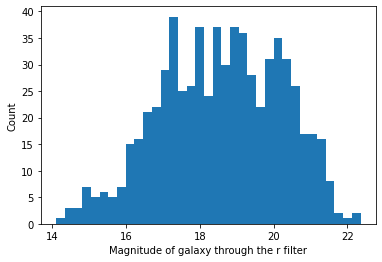

In [8]:
df['r'].plot.hist(bins = 35)
plt.xlabel('Magnitude of galaxy through the r filter')
plt.ylabel('Count')

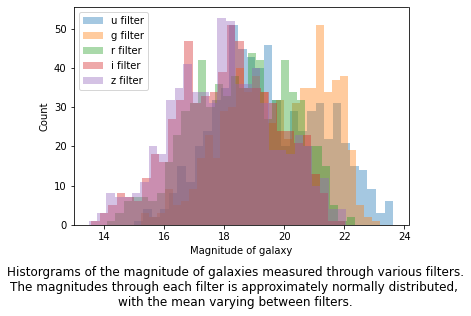

In [9]:
mags = [df['u'], df['g'], df['r'], df['i'], df['z']]
filters = ['u filter', 'g filter', 'r filter', 'i filter', 'z filter']

for i, mag in enumerate(mags):
    plt.hist(mag, alpha=0.4, label = filters[i], bins = 30 )
plt.legend()
plt.xlabel('Magnitude of galaxy')
plt.ylabel('Count')
text = ('Historgrams of the magnitude of galaxies measured through various filters.\n'
        'The magnitudes through each filter is approximately normally distributed, \n'
       'with the mean varying between filters.')
plt.figtext(0.5, -0.15, text, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

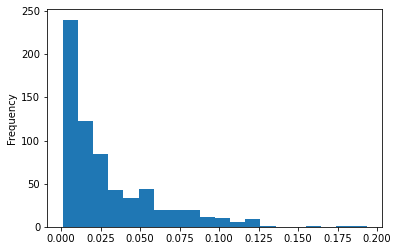

In [10]:
df['dr'].plot.hist(bins = 20)

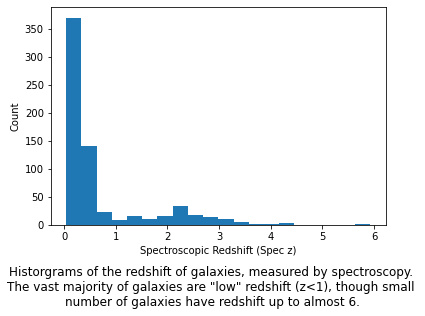

In [11]:
df['zspec'].plot.hist(bins = 20)
plt.xlabel('Spectroscopic Redshift (Spec z)')
plt.ylabel('Count')
text = ('Historgrams of the redshift of galaxies, measured by spectroscopy. \n'
        'The vast majority of galaxies are "low" redshift (z<1), though small \n'
        'number of galaxies have redshift up to almost 6.')
plt.figtext(0.5, -0.15, text, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

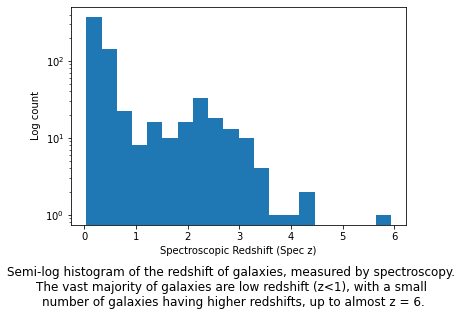

In [12]:
df['zspec'].plot.hist(bins = 20)
plt.semilogy()
plt.xlabel('Spectroscopic Redshift (Spec z)')
plt.ylabel('Log count')
text = ('Semi-log histogram of the redshift of galaxies, measured by spectroscopy. \n'
        'The vast majority of galaxies are low redshift (z<1), with a small \n'
        'number of galaxies having higher redshifts, up to almost z = 6.')
plt.figtext(0.5, -0.15, text, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

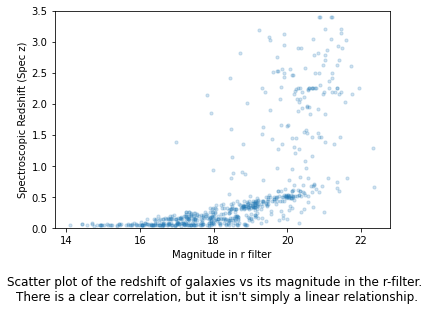

In [13]:
df.plot.scatter('r','zspec',s=10,alpha=0.2, ylim = [0,3.5])
plt.xlabel('Magnitude in r filter')
plt.ylabel('Spectroscopic Redshift (Spec z)')
text = ('Scatter plot of the redshift of galaxies vs its magnitude in the r-filter. \n'
        "There is a clear correlation, but it isn't simply a linear relationship.")
plt.figtext(0.5, -0.12, text, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

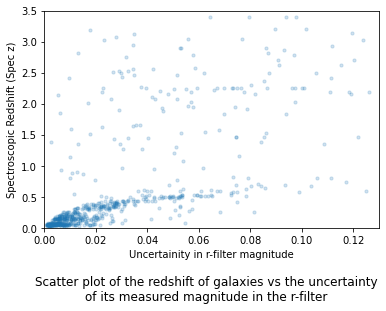

In [14]:
df.plot.scatter('dr','zspec',s=10,alpha=0.2, xlim = [0,0.13], ylim = [0,3.5])
plt.xlabel('Uncertainity in r-filter magnitude')
plt.ylabel('Spectroscopic Redshift (Spec z)')
text = ('Scatter plot of the redshift of galaxies vs the uncertainty\n'
        'of its measured magnitude in the r-filter')
plt.figtext(0.5, -0.12, text, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
X = df.drop('zspec', axis = 1)
y = df['zspec']

bins = np.array([0.,1.,3.,6.])        # bins to statify on 
y_binned = np.digitize(y, bins)

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.6, stratify=y_binned, random_state=23)
X_train

,r,dr,g,dg,u,du,i,di,z,dz
251,20.6780,0.069648,21.1777,0.005914,19.6010,0.009720,20.5474,0.046287,20.5929,0.116052
424,15.6164,0.002087,16.7129,0.000505,16.5502,0.002380,15.1178,0.001066,14.9891,0.002556
313,18.6460,0.016317,19.8385,0.003904,19.4521,0.018468,18.2178,0.008698,18.1320,0.021735
157,19.9641,0.045486,21.9509,0.018242,22.3224,0.133246,19.2948,0.020056,19.0623,0.042568
423,16.9902,0.006213,18.2257,0.001793,18.2669,0.010418,16.3952,0.002858,16.2704,0.006824
...,...,...,...,...,...,...,...,...,...,...
88,17.9255,0.010292,18.9546,0.002073,18.6170,0.008738,17.4802,0.005417,17.3729,0.012634
134,21.4611,0.119350,21.9640,0.011717,21.1372,0.037336,21.2833,0.076825,21.0294,0.159607
316,21.4918,0.086079,21.4818,0.007620,20.6155,0.025671,20.9792,0.048245,21.5304,0.163815
173,18.4528,0.020335,19.4183,0.003417,18.9049,0.011895,18.2306,0.011058,17.7570,0.028798


In [17]:
y_other_binned = np.digitize(y_other, bins)   #bins to stratify on
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size = 0.5, stratify=y_other_binned, random_state=23)
X_val

,r,dr,g,dg,u,du,i,di,z,dz
151,19.1331,0.028527,21.1240,0.011205,21.0284,0.070349,18.7533,0.013341,18.2753,0.028622
399,15.9345,0.002563,17.0959,0.000688,17.1678,0.003940,15.4552,0.001389,15.2735,0.003306
331,19.9769,0.045893,21.9221,0.023126,23.3921,0.168377,19.1581,0.019152,18.7970,0.045707
655,19.2437,0.017674,19.4555,0.001453,18.9130,0.005895,19.0861,0.014299,18.9709,0.041226
320,19.7971,0.025863,20.3200,0.002879,18.7248,0.004941,19.7150,0.021710,19.7079,0.065337
...,...,...,...,...,...,...,...,...,...,...
124,18.0554,0.010491,19.4025,0.002698,19.4919,0.017330,17.5517,0.005214,17.3455,0.012189
476,16.3333,0.002571,17.5233,0.000620,17.5467,0.003635,15.8225,0.001332,15.7032,0.003219
458,20.5515,0.078307,22.3444,0.024747,22.9007,0.161003,19.7461,0.031913,19.6260,0.067890
8,18.1322,0.010763,18.9791,0.001661,18.3634,0.005886,17.8946,0.006149,17.7270,0.014046


In [18]:
X_test

,r,dr,g,dg,u,du,i,di,z,dz
119,19.1829,0.024087,21.0248,0.009413,21.3153,0.070130,18.6210,0.011439,18.4263,0.026098
158,20.3617,0.060850,22.1858,0.023055,21.9019,0.089871,19.6195,0.028234,19.1786,0.050543
168,16.5081,0.003495,17.5832,0.000840,17.4048,0.003897,16.0452,0.001775,15.9609,0.004348
181,17.8689,0.009733,18.8134,0.001884,18.2492,0.006764,17.5046,0.005415,17.3591,0.014660
249,17.8175,0.008123,19.2912,0.002271,19.2467,0.013113,17.5308,0.004673,17.1959,0.008839
...,...,...,...,...,...,...,...,...,...,...
645,19.1860,0.031011,21.0244,0.013982,21.9880,0.099647,18.4520,0.013288,18.2052,0.027049
577,19.1155,0.026682,21.0538,0.011085,21.5293,0.082805,18.5034,0.011959,18.3318,0.029626
446,17.4305,0.007379,18.4266,0.001619,18.4210,0.007938,16.9803,0.003978,16.9578,0.009690
575,21.2086,0.111396,21.0874,0.006613,20.6425,0.030729,21.0273,0.070078,20.6565,0.125460


In [19]:
print(y_train)
print(y_val)
print(y_test)

251    2.255000
424    0.059424
313    0.190258
157    0.517019
423    0.149904
         ...   
88     0.131660
134    3.145000
316    2.905000
173    0.164027
240    0.058385
Name: zspec, Length: 400, dtype: float64
151    0.337950
399    0.057950
331    0.486954
655    3.194752
320    2.085000
         ...   
124    0.149873
476    0.055695
458    0.511389
8      0.142093
503    0.051576
Name: zspec, Length: 133, dtype: float64
119    0.309008
158    0.515548
168    0.137846
181    0.147608
249    0.162772
         ...   
645    0.423437
577    0.347492
446    0.053534
575    2.413277
170    1.355000
Name: zspec, Length: 134, dtype: float64


In [20]:
features = [feat for feat in X.columns]

# all features continuous, with no strict upper bound, hence use standard scaler to preprocess all

preprocessor = ColumnTransformer(
    transformers = [
        ('stnd', StandardScaler(), features)
    ])

clf = Pipeline(steps = [('preprocessor', preprocessor)])

X_train_pre = clf.fit_transform(X_train)
X_val_pre = clf.transform(X_val)
X_test_pre = clf.transform(X_test)

In [21]:
X_train_pre

array([[ 1.28569735,  1.29827312,  0.8918625 , ...,  1.63909714,
         1.49776814,  1.72486013],
       [-1.77299051, -0.86792488, -1.79514575, ..., -0.80433674,
        -1.73981095, -0.79627733],
       [ 0.05777461, -0.41166728,  0.08590446, ..., -0.39198934,
         0.07599035, -0.37025671],
       ...,
       [ 1.77747074,  1.8251034 ,  1.07487612, ...,  1.74491093,
         2.03940603,  2.78584439],
       [-0.05897474, -0.2828237 , -0.16698052, ..., -0.2644649 ,
        -0.1406648 , -0.2133493 ],
       [-0.08151485, -0.64826205, -0.29047409, ..., -0.49270507,
         0.16415456, -0.51600627]])

In [22]:
X_val_pre

array([[ 0.35212558, -0.02018928,  0.85954474, ..., -0.14108483,
         0.15878151, -0.21725888],
       [-1.58076501, -0.85265442, -1.56464849, ..., -0.78691364,
        -1.57549968, -0.77961409],
       [ 0.86202775,  0.53662274,  1.3398577 , ...,  0.17290378,
         0.46019216,  0.16224575],
       ...,
       [ 1.20925432,  1.57590001,  1.5940065 , ...,  0.86239814,
         0.93914449,  0.65501711],
       [-0.25271097, -0.58972375, -0.43130009, ..., -0.52972449,
        -0.15799722, -0.54106089],
       [-1.50401984, -0.8706845 , -1.48286108, ..., -0.80741016,
        -1.49952594, -0.7999499 ]])

In [23]:
X_test_pre

array([[ 0.38221935, -0.16253122,  0.79984414, ..., -0.24386193,
         0.24602132, -0.27332802],
       [ 1.09455957,  1.01619273,  1.49855777, ...,  0.66360893,
         0.68066045,  0.26966588],
       [-1.23414272, -0.82276053, -1.27138135, ..., -0.76606104,
        -1.17835634, -0.75648137],
       ...,
       [-0.67674315, -0.6982236 , -0.76380593, ..., -0.64701283,
        -0.60240027, -0.6378172 ],
       [ 1.60633505,  2.63681954,  0.83751811, ...,  2.92461872,
         1.53451286,  1.9338449 ],
       [ 1.6367914 ,  2.54790993,  1.20655445, ...,  2.84046156,
         1.93252282,  2.44591093]])